In [4]:
import tensorflow as tf
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import warnings

# Make NumPy printouts easier to read.
np.set_printoptions(precision=5, suppress=True)
warnings.filterwarnings("ignore")

print(tf.__version__)

2.15.0


In [5]:
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

Num GPUs Available:  0


In [6]:
def build_and_compile_model_input(k):
      model = tf.keras.models.Sequential([
          tf.keras.layers.Dense(512, activation='relu', input_shape=(k,)),
          tf.keras.layers.Dense(256, activation='relu'),
          tf.keras.layers.Dense(128, activation='relu'),
          tf.keras.layers.Dense(64, activation='relu'),
          tf.keras.layers.Dense(32, activation='relu'),
          tf.keras.layers.Dense(1,activation='linear') 
    ])

      model.compile(optimizer=tf.optimizers.Adam(learning_rate=0.0005),
                    loss="mse",
                    metrics=['mae'])
      return model

EPOCHS = 20
BATCH_SIZE=64

DATASET=pd.read_csv('../dane_scalone.csv')


In [7]:
DATASET

,Pora_roku,Dzien_tygodnia,Czas_dnia,Przeplyw
0,2.0,1.0,0.000000,0.0
1,2.0,1.0,0.000694,0.0
2,2.0,1.0,0.001389,0.0
3,2.0,1.0,0.002083,0.0
4,2.0,1.0,0.002778,0.0
...,...,...,...,...
12418555,1.0,7.0,0.996528,0.0
12418556,1.0,7.0,0.997222,0.0
12418557,1.0,7.0,0.997917,0.0
12418558,1.0,7.0,0.998611,0.0


MODEL A - INPUT(dzień tygodnia, pora dnia) OUTPUT(przepływ)

In [8]:
dataset = DATASET
dataset=dataset.drop(columns="Pora_roku")
dataset['Czas_dnia'] = dataset['Czas_dnia'] * 100
x=dataset.drop(columns="Przeplyw")
y=dataset.drop(columns="Dzien_tygodnia")
y=y.drop(columns="Czas_dnia")

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
model =build_and_compile_model_input(2)
model.fit(x_train, y_train, epochs=EPOCHS, batch_size=BATCH_SIZE)


Epoch 1/20


155232/155232 [==============================] - 260s 2ms/step - loss: 0.6950 - mae: 0.1637
Epoch 2/20
155232/155232 [==============================] - 252s 2ms/step - loss: 0.6907 - mae: 0.1619
Epoch 3/20
155232/155232 [==============================] - 253s 2ms/step - loss: 0.6898 - mae: 0.1613
Epoch 4/20
155232/155232 [==============================] - 259s 2ms/step - loss: 0.6899 - mae: 0.1614
Epoch 5/20
155232/155232 [==============================] - 250s 2ms/step - loss: 0.6892 - mae: 0.1609
Epoch 6/20
155232/155232 [==============================] - 255s 2ms/step - loss: 0.6893 - mae: 0.1612
Epoch 7/20
155232/155232 [==============================] - 250s 2ms/step - loss: 0.6894 - mae: 0.1627
Epoch 8/20
155232/155232 [==============================] - 250s 2ms/step - loss: 0.6893 - mae: 0.1628
Epoch 9/20
155232/155232 [==============================] - 249s 2ms/step - loss: 0.6892 - mae: 0.1630
Epoch 10/20
155232/155232 [==============================] - 249s 2ms/

In [9]:
model.evaluate(x_test, y_test, batch_size=BATCH_SIZE)

38808/38808 [==============================] - 29s 755us/step - loss: 0.6911 - mae: 0.1533


[0.6911098957061768, 0.15325704216957092]

45/45 [==============================] - 0s 815us/step


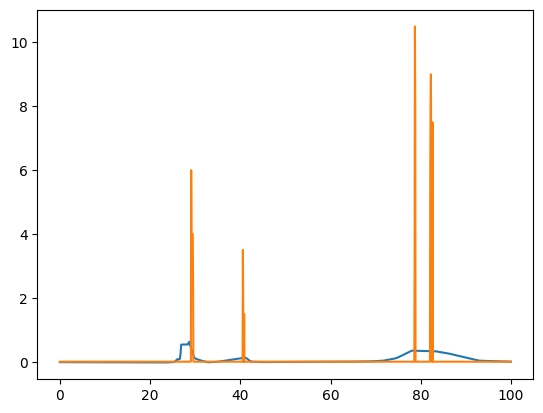

In [10]:
flow_time_plot=np.arange(0,100,100/1440) 
flow_time=np.vstack((1*np.ones_like(flow_time_plot, dtype=int),flow_time_plot)).T
flow_result = model.predict(flow_time)

plt.plot(flow_time_plot, flow_result)
plt.plot(flow_time_plot, DATASET.Przeplyw.iloc[0:1440])

MODEL B - MODEL A - INPUT(pora dnia) OUTPUT(przepływ)


In [11]:
def prep_data(data,day):
      data=data.drop(columns="Pora_roku")
      data = data[data['Dzien_tygodnia'] == day]

      data['Czas_dnia'] = data['Czas_dnia'] * 100
      x=data.drop(columns="Przeplyw")
      x=x.drop(columns="Dzien_tygodnia")
      y=data.drop(columns="Dzien_tygodnia")
      y=y.drop(columns="Czas_dnia")
      return [x,y]

PORÓWNIANIE DNI TYGODNIA

In [12]:
dataset = DATASET
[x,y]=prep_data(dataset,1)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
model_pon = build_and_compile_model_input(1)
model_pon.fit(x_train, y_train, epochs=EPOCHS, batch_size=BATCH_SIZE)
flow_time_pon=np.arange(0,100,100/1440) 
flow_result_pon = model_pon.predict(flow_time_pon).T
# plt.plot(flow_time_pon, flow_result_pon.reshape(1440))


dataset = DATASET
[x,y]=prep_data(dataset,2)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
model_wt = build_and_compile_model_input(1)
model_wt.fit(x_train, y_train, epochs=EPOCHS, batch_size=BATCH_SIZE)
flow_time_wt=np.arange(0,100,100/1440) 
flow_result_wt = model_wt.predict(flow_time_wt)
# plt.plot(flow_time_wt, flow_result_wt.reshape(1440))

dataset = DATASET
[x,y]=prep_data(dataset,3)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
model_sr = build_and_compile_model_input(1)
model_sr.fit(x_train, y_train, epochs=EPOCHS, batch_size=BATCH_SIZE)
flow_time_sr=np.arange(0,100,100/1440)  
flow_result_sr = model_sr.predict(flow_time_sr)   
# plt.plot(flow_time_sr, flow_result_sr.reshape(1440))

dataset = DATASET
[x,y]=prep_data(dataset,4)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
model_czw = build_and_compile_model_input(1)
model_czw.fit(x_train, y_train, epochs=EPOCHS, batch_size=BATCH_SIZE)
flow_time_czw=np.arange(0,100,100/1440) 
flow_result_czw = model_czw.predict(flow_time_czw)   
# plt.plot(flow_time_czw, flow_result_czw.reshape(1440))

dataset = DATASET
[x,y]=prep_data(dataset,5)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
model_pt = build_and_compile_model_input(1)
model_pt.fit(x_train, y_train, epochs=EPOCHS, batch_size=BATCH_SIZE)
flow_time_pt=np.arange(0,100,100/1440)  
flow_result_pt = model_pt.predict(flow_time_pt)   
# plt.plot(flow_time_pt, flow_result_pt.reshape(1440))


dataset = DATASET
[x,y]=prep_data(dataset,6)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
model_sob = build_and_compile_model_input(1)
model_sob.fit(x_train, y_train, epochs=EPOCHS, batch_size=BATCH_SIZE)
flow_time_sob=np.arange(0,100,100/1440) 
flow_result_sob = model_sob.predict(flow_time_sob)   
# plt.plot(flow_time_sob, flow_result_sob.reshape(1440))

 
dataset = DATASET 
[x,y]=prep_data(dataset,7)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
model_nd = build_and_compile_model_input(1)
model_nd.fit(x_train, y_train, epochs=EPOCHS, batch_size=BATCH_SIZE)
flow_time_nd=np.arange(0,100,100/1440) 
flow_result_nd = model_nd.predict(flow_time_nd)   
# plt.plot(flow_time_nd, flow_result_nd.reshape(1440))

Epoch 1/20
22176/22176 [==============================] - 33s 1ms/step - loss: 0.8255 - mae: 0.1866
Epoch 2/20
22176/22176 [==============================] - 32s 1ms/step - loss: 0.8142 - mae: 0.1866
Epoch 3/20
22176/22176 [==============================] - 32s 1ms/step - loss: 0.8109 - mae: 0.1873
Epoch 4/20
22176/22176 [==============================] - 32s 1ms/step - loss: 0.8101 - mae: 0.1867
Epoch 5/20
22176/22176 [==============================] - 32s 1ms/step - loss: 0.8094 - mae: 0.1865
Epoch 6/20
22176/22176 [==============================] - 32s 1ms/step - loss: 0.8088 - mae: 0.1858
Epoch 7/20
22176/22176 [==============================] - 32s 1ms/step - loss: 0.8088 - mae: 0.1849
Epoch 8/20
22176/22176 [==============================] - 32s 1ms/step - loss: 0.8082 - mae: 0.1840
Epoch 9/20
22176/22176 [==============================] - 32s 1ms/step - loss: 0.8077 - mae: 0.1836
Epoch 10/20
22176/22176 [==============================] - 32s 1ms/step - loss: 0.8075 - mae: 0.1829

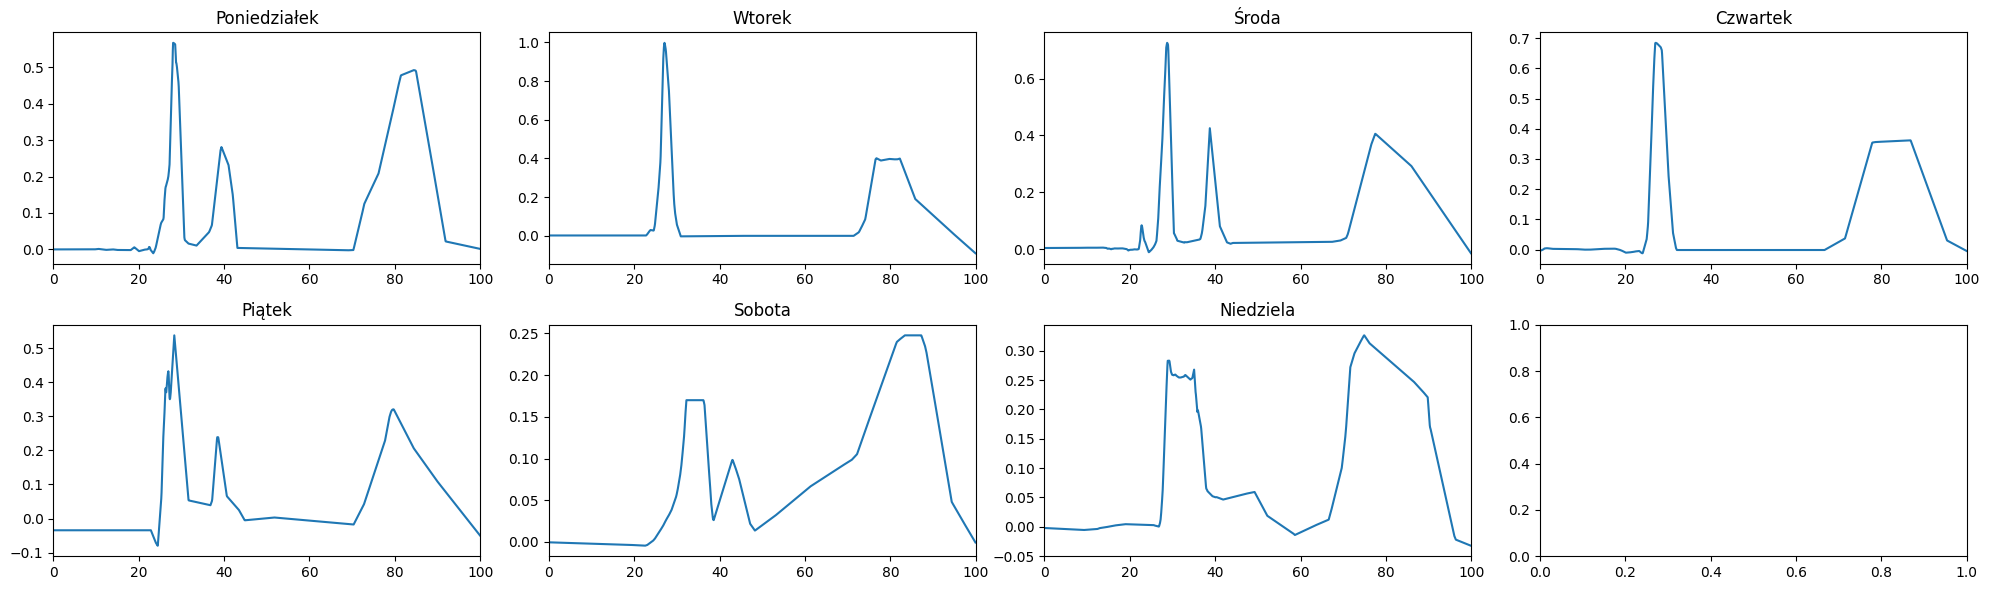

In [13]:
fig, axs = plt.subplots(2, 4, figsize=(20, 6))


axs[0,0].plot(flow_time_pon, flow_result_pon.reshape(1440))
axs[0,0].set_title('Poniedziałek')
axs[0,0].set_xlim(0, 100)

axs[0,1].plot(flow_time_wt, flow_result_wt.reshape(1440))
axs[0,1].set_title('Wtorek')
axs[0,1].set_xlim(0, 100)

axs[0,2].plot(flow_time_sr, flow_result_sr.reshape(1440))
axs[0,2].set_title('Środa')
axs[0,2].set_xlim(0, 100)

axs[0,3].plot(flow_time_czw, flow_result_czw.reshape(1440))
axs[0,3].set_title('Czwartek')
axs[0,3].set_xlim(0, 100)

axs[1,0].plot(flow_time_pt, flow_result_pt.reshape(1440))
axs[1,0].set_title('Piątek')
axs[1,0].set_xlim(0, 100)

axs[1,1].plot(flow_time_sob, flow_result_sob.reshape(1440))
axs[1,1].set_title('Sobota')
axs[1,1].set_xlim(0, 100)

axs[1,2].plot(flow_time_nd, flow_result_nd.reshape(1440))
axs[1,2].set_title('Niedziela')
axs[1,2].set_xlim(0, 100)

plt.tight_layout()

plt.show()

MODEL C - MODEL A - INPUT(pora roku, dzień tygodnia, pora dnia) OUTPUT(przepływ)

In [14]:
def prep_data(data,sezon):
      data = data[data['Pora_roku'] == sezon]
      data['Czas_dnia'] = data['Czas_dnia'] * 100
      x=data.drop(columns="Przeplyw")
      y=data.drop(columns="Dzien_tygodnia")
      y=y.drop(columns="Czas_dnia")
      y=y.drop(columns="Pora_roku")
      
      return [x,y]

WSZYSTKIE PORY ROKU

Epoch 1/20
155232/155232 [==============================] - 223s 1ms/step - loss: 0.6957 - mae: 0.1646
Epoch 2/20
155232/155232 [==============================] - 222s 1ms/step - loss: 0.6907 - mae: 0.1630
Epoch 3/20
155232/155232 [==============================] - 222s 1ms/step - loss: 0.6894 - mae: 0.1622
Epoch 4/20
155232/155232 [==============================] - 222s 1ms/step - loss: 0.6893 - mae: 0.1623
Epoch 5/20
155232/155232 [==============================] - 223s 1ms/step - loss: 0.6899 - mae: 0.1649
Epoch 6/20
155232/155232 [==============================] - 222s 1ms/step - loss: 0.6886 - mae: 0.1647
Epoch 7/20
155232/155232 [==============================] - 221s 1ms/step - loss: 0.6881 - mae: 0.1651
Epoch 8/20
155232/155232 [==============================] - 221s 1ms/step - loss: 0.6876 - mae: 0.1650
Epoch 9/20
155232/155232 [==============================] - 222s 1ms/step - loss: 0.6880 - mae: 0.1655
Epoch 10/20
155232/155232 [==============================] - 224s 1ms/ste

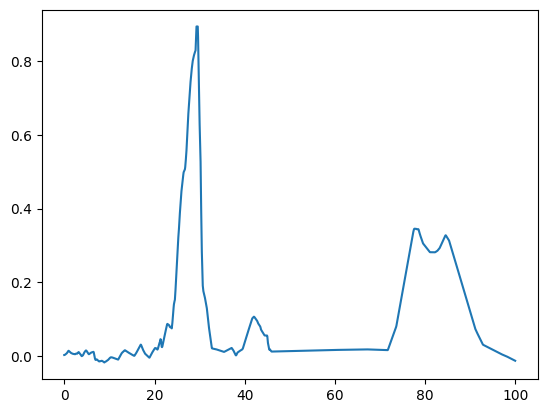

In [15]:
dataset = DATASET

dataset['Czas_dnia'] = dataset['Czas_dnia'] * 100
x=dataset.drop(columns="Przeplyw")
y=dataset.drop(columns="Dzien_tygodnia")
y=y.drop(columns="Czas_dnia")
y=y.drop(columns="Pora_roku")

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
model_pon = build_and_compile_model_input(3)
model_pon.fit(x_train, y_train, epochs=EPOCHS, batch_size=BATCH_SIZE)

flow_time_plot=np.arange(0,100,100/1440) 
flow_time=np.vstack((1*np.ones_like(flow_time_plot, dtype=int),1*np.ones_like(flow_time_plot, dtype=int),flow_time_plot)).T
flow_result = model_pon.predict(flow_time)   

plt.plot(flow_time_plot, flow_result)

PORÓWNIANIE PÓR ROKU

In [16]:
dataset = DATASET
[x,y]=prep_data(dataset,1)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
model_spring = build_and_compile_model_input(3)
model_spring.fit(x_train, y_train, epochs=EPOCHS, batch_size=BATCH_SIZE)
flow_time_spring_plot=np.arange(0,100,100/1440) 
flow_time_spring=np.vstack((1*np.ones_like(flow_time_spring_plot, dtype=int),1*np.ones_like(flow_time_spring_plot, dtype=int),flow_time_spring_plot)).T
flow_result_spring = model_spring.predict(flow_time_spring)   
# plt.plot(flow_time_spring_plot, flow_result_spring)

dataset = DATASET
[x,y]=prep_data(dataset,2)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
model_summer = build_and_compile_model_input(3)
model_summer.fit(x_train, y_train, epochs=EPOCHS, batch_size=BATCH_SIZE)
flow_time_summer_plot=np.arange(0,100,100/1440) 
flow_time_summer=np.vstack((2*np.ones_like(flow_time_summer_plot, dtype=int),1*np.ones_like(flow_time_summer_plot, dtype=int),flow_time_summer_plot)).T
flow_result_summer = model_summer.predict(flow_time_summer)   
# plt.plot(flow_time_summer_plot, flow_result_summer)


dataset = DATASET
[x,y]=prep_data(dataset,3)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
model_fall = build_and_compile_model_input(3)
model_fall.fit(x_train, y_train, epochs=EPOCHS, batch_size=BATCH_SIZE)
flow_time_fall_plot=np.arange(0,100,100/1440) 
flow_time_fall=np.vstack((3*np.ones_like(flow_time_fall_plot, dtype=int),1*np.ones_like(flow_time_fall_plot, dtype=int),flow_time_fall_plot)).T
flow_result_fall = model_fall.predict(flow_time_fall)   
# plt.plot(flow_time_fall_plot, flow_result_fall)

dataset = DATASET
[x,y]=prep_data(dataset,4)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
model_winter = build_and_compile_model_input(3)
model_winter.fit(x_train, y_train, epochs=EPOCHS, batch_size=BATCH_SIZE)
flow_time_winter_plot=np.arange(0,100,100/1440) 
flow_time_winter=np.vstack((4*np.ones_like(flow_time_winter_plot, dtype=int),1*np.ones_like(flow_time_winter_plot, dtype=int),flow_time_winter_plot)).T
flow_result_winter = model_winter.predict(flow_time_winter)   
# plt.plot(flow_time_winter_plot, flow_result_winter)

Epoch 1/20
38808/38808 [==============================] - 56s 1ms/step - loss: 5.8519 - mae: 0.4795
Epoch 2/20
38808/38808 [==============================] - 56s 1ms/step - loss: 0.7527 - mae: 0.1762
Epoch 3/20
38808/38808 [==============================] - 56s 1ms/step - loss: 0.7508 - mae: 0.1756
Epoch 4/20
38808/38808 [==============================] - 55s 1ms/step - loss: 0.7509 - mae: 0.1751
Epoch 5/20
38808/38808 [==============================] - 55s 1ms/step - loss: 0.7509 - mae: 0.1751
Epoch 6/20
38808/38808 [==============================] - 55s 1ms/step - loss: 0.7509 - mae: 0.1752
Epoch 7/20
38808/38808 [==============================] - 56s 1ms/step - loss: 0.7509 - mae: 0.1751
Epoch 8/20
38808/38808 [==============================] - 56s 1ms/step - loss: 0.7509 - mae: 0.1752
Epoch 9/20
38808/38808 [==============================] - 56s 1ms/step - loss: 0.7509 - mae: 0.1752
Epoch 10/20
38808/38808 [==============================] - 56s 1ms/step - loss: 0.7509 - mae: 0.1752

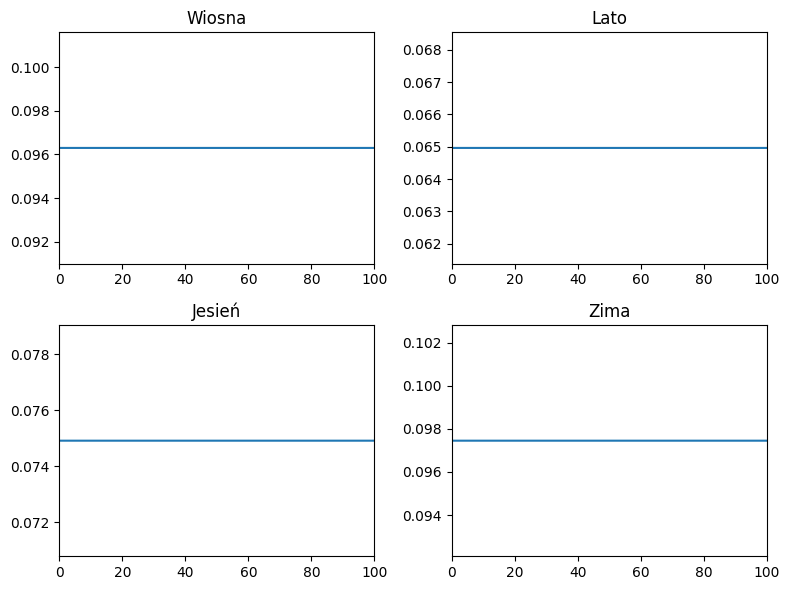

In [17]:
fig, axs = plt.subplots(2, 2, figsize=(8, 6))


axs[0,0].plot(flow_time_spring_plot, flow_result_spring)
axs[0,0].set_title('Wiosna')
axs[0,0].set_xlim(0, 100)

axs[0,1].plot(flow_time_summer_plot, flow_result_summer)
axs[0,1].set_title('Lato')
axs[0,1].set_xlim(0, 100)

axs[1,0].plot(flow_time_fall_plot, flow_result_fall)
axs[1,0].set_title('Jesień')
axs[1,0].set_xlim(0, 100)

axs[1,1].plot(flow_time_winter_plot, flow_result_winter)
axs[1,1].set_title('Zima')
axs[1,1].set_xlim(0, 100)

plt.tight_layout()

plt.show()